### Importing training file

In [15]:
file_path = 'train_generator_num_200_21972639.err'

# We'll read the first few lines to determine the content and format
with open(file_path, 'r', encoding="utf-8") as f:
    data = f.read()
data[:100]

'Loaded module: cuda/10.1\n[2024-06-10 14:32:44,648::train::INFO] Namespace(beta_1=0.0001, beta_T=0.05'

### 

### Plotting loss over iterations 

In [16]:
matches

[('0.147500', '0.057500'),
 ('0.270000', '0.075000'),
 ('0.287500', '0.100000'),
 ('0.322500', '0.132500'),
 ('0.355000', '0.142500'),
 ('0.345000', '0.195000'),
 ('0.375000', '0.177500'),
 ('0.335000', '0.162500'),
 ('0.362500', '0.200000'),
 ('0.352500', '0.182500'),
 ('0.372500', '0.210000'),
 ('0.357500', '0.212500'),
 ('0.372500', '0.180000'),
 ('0.400000', '0.212500'),
 ('0.385000', '0.215000'),
 ('0.355000', '0.185000'),
 ('0.370000', '0.202500'),
 ('0.375000', '0.247500'),
 ('0.390000', '0.227500'),
 ('0.400000', '0.177500'),
 ('0.392500', '0.232500'),
 ('0.360000', '0.230000'),
 ('0.387500', '0.207500'),
 ('0.382500', '0.267500'),
 ('0.412500', '0.220000'),
 ('0.380000', '0.237500'),
 ('0.390000', '0.227500'),
 ('0.395000', '0.225000'),
 ('0.387500', '0.205000'),
 ('0.415000', '0.245000'),
 ('0.400000', '0.242500'),
 ('0.390000', '0.230000'),
 ('0.372500', '0.235000'),
 ('0.387500', '0.222500'),
 ('0.382500', '0.185000'),
 ('0.397500', '0.225000'),
 ('0.390000', '0.217500'),
 

In [17]:
import numpy as np
import re
import matplotlib.pyplot as plt

# Regex to extract the validation data
pattern = r"\[Test\] Coverage[\s]+\| CD ([\d\.]+) \| EMD ([\d\.]+)"
matches = re.findall(pattern, data)

# Convert the data to numerical format for plotting
iterations = [x * 1000 for x in range(len(matches))]
cd_values = [float(m[0]) for m in matches]
emd_values = [float(m[1]) for m in matches]

# Plotting the validation curve EMD
plt.figure(figsize=(10, 5))
plt.plot(iterations, emd_values, label='Earth Mover’s Distance (EMD)', marker='.')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Validation Earth Mover\'s Distance Curve')
plt.legend()
plt.grid(True)
plt.savefig('Validation_EMD\'s_curve.png', dpi=500)
plt.show()

In [18]:
# Plotting the validation curve CD
plt.figure(figsize=(10, 5))
plt.plot(np.log(iterations), cd_values, label='Chamfer Distance (CD)', marker='.')
plt.xlabel('Log Iterations')
plt.ylabel('Values')
plt.title('Validation Chamfer Distance Curve')
plt.legend()
plt.grid(True)
plt.savefig('Validation_CD_curve.png', dpi=500)
plt.show()


C:\Users\henri\AppData\Local\Temp\ipykernel_29828\1898749074.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(iterations), cd_values, label='Chamfer Distance (CD)', marker='.')


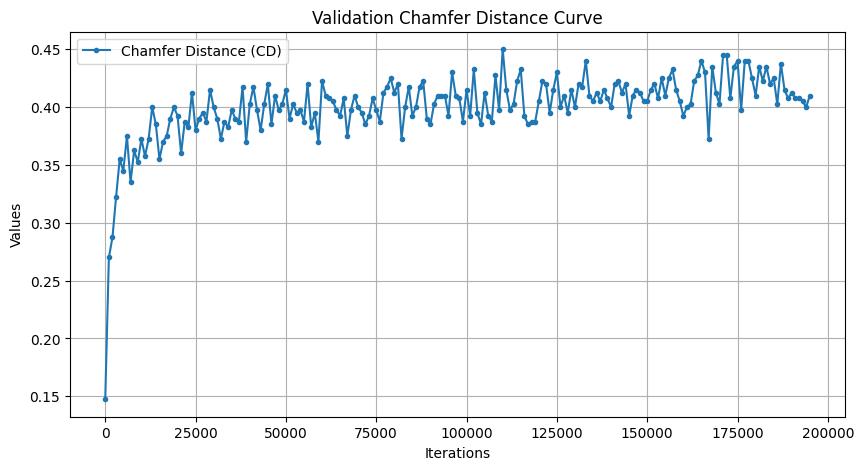

In [19]:
# Plotting the validation curve CD
plt.figure(figsize=(10, 5))
plt.plot(iterations, cd_values, label='Chamfer Distance (CD)', marker='.')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Validation Chamfer Distance Curve')
plt.legend()
plt.grid(True)
plt.savefig('Validation_CD_curve.png', dpi=500)
plt.show()



### Plotting EMD over iterations

In [20]:
# Read the provided simpler data file
simple_file_path = 'all.txt'

with open(simple_file_path, 'r') as file:
    simple_data = file.read()

# Use the regex pattern provided by the user earlier to extract EMD values
simple_emd_values = re.findall(r"\[Test\] MinMatDis[\s]+\| CD ([\d\.]+) \| EMD ([\d\.]+)", simple_data)
simple_emd_values = [float(emd) for emd in simple_emd_values]
simple_iterations = [i * 1000 for i in range(len(simple_emd_values))]

# Verify the extracted data
simple_iterations[:5], simple_emd_values[:5]


([0, 1000, 2000, 3000, 4000], [0.0575, 0.075, 0.1, 0.1325, 0.1425])

In [21]:
# Create the plot using the simpler data
plt.figure(figsize=(12, 6))
plt.plot(simple_iterations, simple_emd_values, marker='o', linestyle='-', color='r')
plt.title('Earth Mover\'s Distance (EMD) over Iterations (Simple Data)')
plt.xlabel('Iterations')
plt.ylabel('MMD')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
